#  Rule-Based Classification 

Rule-Based Classification is a method of categorizing data using predefined logical rules and conditions. This approach stands as one of the most fundamental and comprehensible classification methods in the machine learning world.

The greatest advantage of this method lies in its transparency and understandability. Even individuals without data science expertise can easily comprehend and modify the rules. However, when dealing with complex problems, the method might require numerous rules, which can make management more challenging. 

### The Business Problem 

* Create new sales definitions: Develop (level-based) sales definitions and create new segments based on these definitions.
* Segment Analysis: Establish new customer segments and analyze them to predict potential revenue.
* Revenue Prediction: Determine how much a company can earn on average from prospective customers.

For example, if a customer plans to visit an All-Inclusive hotel in Antalya during a busy season, the goal is to predict the average revenue the company can generate from such a customer. 

### The Data Set Story 

The dataset provides information about sales transactions made by the Gezinomi company. It contains records of sales prices and various details about each transaction. This data can be used to analyze and predict revenue, customer behavior, and seasonal trends. 

 Key Features in the Dataset:

* SaleId: Unique identifier for each sales transaction.
* SaleDate: The date when the sale was made.
* Price: The amount paid for the sale.
* ConceptName: Information about the hotel concept.
* SaleCityName: The city where the hotel is located.
* CheckInDate: The date when the customer checked into the hotel.
* CInDay: The day of the week of the customer's check-in.
* SaleCheckInDayDiff: The number of days between the sale date and the check-in date.
* Season: The season of the check-in date.


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.simplefilter(action="ignore")

In [15]:
# Adjusting Row Column Settings
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

# Loading the Data Set
df = pd.read_excel("input/gezinomi.xlsx")
df.head()


,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons
0,415122,2022-12-03,2022-12-03,79.30,Herşey Dahil,Antalya,Saturday,0,Low
1,415103,2022-12-03,2022-12-03,45.97,Yarım Pansiyon,Antalya,Saturday,0,Low
2,404034,2022-09-12,2022-09-13,77.84,Herşey Dahil,Antalya,Tuesday,1,High
3,415094,2022-12-03,2022-12-10,222.71,Yarım Pansiyon,İzmir,Saturday,7,Low
4,414951,2022-12-01,2022-12-03,140.48,Yarım Pansiyon,İzmir,Saturday,2,Low


In [16]:
df = df.drop("SaleId", axis=1)
df.head()

,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons
0,2022-12-03,2022-12-03,79.30,Herşey Dahil,Antalya,Saturday,0,Low
1,2022-12-03,2022-12-03,45.97,Yarım Pansiyon,Antalya,Saturday,0,Low
2,2022-09-12,2022-09-13,77.84,Herşey Dahil,Antalya,Tuesday,1,High
3,2022-12-03,2022-12-10,222.71,Yarım Pansiyon,İzmir,Saturday,7,Low
4,2022-12-01,2022-12-03,140.48,Yarım Pansiyon,İzmir,Saturday,2,Low


In [17]:
# To split the "SaleDate" variable into separate year, month, and day variables
df['SaleYear'] = df['SaleDate'].dt.year
df['SaleMonth'] = df['SaleDate'].dt.month
df['SaleDay'] = df['SaleDate'].dt.day
df = df.drop("SaleDate", axis=1)
df.head()

,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons,SaleYear,SaleMonth,SaleDay
0,2022-12-03,79.30,Herşey Dahil,Antalya,Saturday,0,Low,2022,12,3
1,2022-12-03,45.97,Yarım Pansiyon,Antalya,Saturday,0,Low,2022,12,3
2,2022-09-13,77.84,Herşey Dahil,Antalya,Tuesday,1,High,2022,9,12
3,2022-12-10,222.71,Yarım Pansiyon,İzmir,Saturday,7,Low,2022,12,3
4,2022-12-03,140.48,Yarım Pansiyon,İzmir,Saturday,2,Low,2022,12,1


In [18]:
# Filling the empty observations of the Price variable with the mean.
df['Price'].fillna(df['Price'].mean(), inplace=True)
df.head()

,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons,SaleYear,SaleMonth,SaleDay
0,2022-12-03,79.30,Herşey Dahil,Antalya,Saturday,0,Low,2022,12,3
1,2022-12-03,45.97,Yarım Pansiyon,Antalya,Saturday,0,Low,2022,12,3
2,2022-09-13,77.84,Herşey Dahil,Antalya,Tuesday,1,High,2022,9,12
3,2022-12-10,222.71,Yarım Pansiyon,İzmir,Saturday,7,Low,2022,12,3
4,2022-12-03,140.48,Yarım Pansiyon,İzmir,Saturday,2,Low,2022,12,1


In [19]:
# Capturing / Detecting Numeric and Categorical Variables
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.
    Parameters
    ------
         dataframe: dataframe
                Dataframe to get variable names
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables
    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical view
    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))
    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != 'O']
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == 'O']
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [20]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 59164
Variables: 10
cat_cols: 5
num_cols: 5
cat_but_car: 0
num_but_cat: 1


In [27]:
# Categorical Variable Analysis
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, plot=False)

                ConceptName  Ratio
ConceptName                       
Herşey Dahil          53186  89.90
Yarım Pansiyon         3559   6.02
Oda + Kahvaltı         2419   4.09
##########################################
              SaleCityName  Ratio
SaleCityName                     
Antalya              31649  53.49
Muğla                10662  18.02
Aydın                10646  17.99
Diğer                 3245   5.48
İzmir                 2507   4.24
Girne                  455   0.77
##########################################
           CInDay  Ratio
CInDay                  
Monday      12794  21.62
Saturday     9967  16.85
Friday       8683  14.68
Thursday     7314  12.36
Sunday       7050  11.92
Tuesday      6807  11.51
Wednesday    6549  11.07
##########################################
         Seasons  Ratio
Seasons                
High       50946  86.11
Low         8218  13.89
##########################################
          SaleYear  Ratio
SaleYear                 
2022    

In [26]:
# Numerical Variable Analysis
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col, plot=False)


count                            59164
mean     2021-03-15 11:23:01.732134400
min                2007-07-20 00:00:00
5%                 2017-03-13 07:12:00
10%                2018-05-04 00:00:00
20%                2020-07-30 00:00:00
30%      2021-03-16 21:35:59.999999744
40%                2021-07-11 00:00:00
50%                2021-08-16 00:00:00
60%                2021-10-21 00:00:00
70%                2022-06-11 00:00:00
80%                2022-07-22 00:00:00
90%                2022-08-27 00:00:00
95%                2022-09-12 00:00:00
99%                2022-11-04 00:00:00
max                2023-08-16 00:00:00
Name: CheckInDate, dtype: object
count   59164.00
mean       61.35
std        51.38
min         0.00
5%         19.64
10%        24.46
20%        31.80
30%        39.17
40%        46.36
50%        54.27
60%        61.86
70%        72.21
80%        84.85
90%       106.29
95%       125.45
99%       172.74
max      4880.47
Name: Price, dtype: float64
count   59164.00
mean     

In [25]:
# Analysis of Categorical Variables by Target Variable

def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=categorical_col, y=target, data=dataframe)
        plt.show(block=True)

for col in cat_cols:
    target_summary_with_cat(df, 'Price', col, plot=False)

                TARGET_MEAN
ConceptName                
Herşey Dahil          62.67
Oda + Kahvaltı        50.27
Yarım Pansiyon        49.04


              TARGET_MEAN
SaleCityName             
Antalya             64.52
Aydın               53.86
Diğer               47.73
Girne               59.48
Muğla               62.46
İzmir               66.26


           TARGET_MEAN
CInDay                
Friday           58.76
Monday           61.23
Saturday         60.42
Sunday           62.97
Thursday         60.57
Tuesday          63.45
Wednesday        63.34


         TARGET_MEAN
Seasons             
High           62.48
Low            54.29


          TARGET_MEAN
SaleYear             
2016            71.35
2017            67.33
2018            61.06
2019            76.40
2020            52.65
2021            60.56
2022            61.28




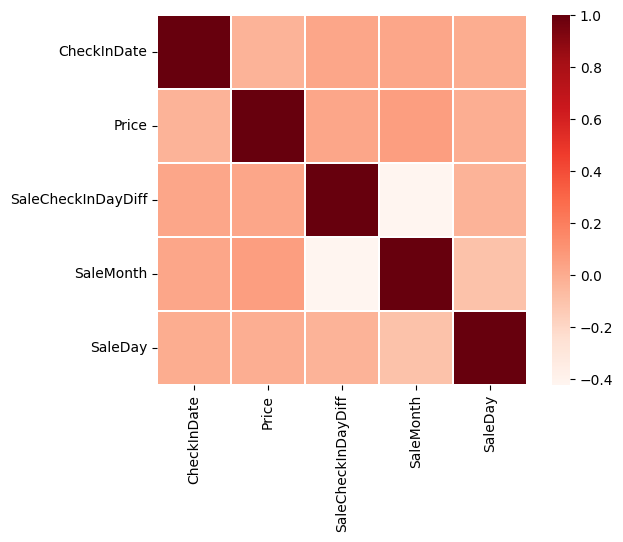

SaleCheckInDayDiff  SaleMonth            0.42
SaleMonth           SaleDay              0.10
Price               SaleMonth            0.06
CheckInDate         Price                0.03
SaleCheckInDayDiff  SaleDay              0.03
CheckInDate         SaleCheckInDayDiff   0.02
                    SaleMonth            0.02
Price               SaleCheckInDayDiff   0.02
                    SaleDay              0.01
CheckInDate         SaleDay              0.00
dtype: float64

In [30]:
# Correlation Analysis of the Variables

def df_corr(dataframe, annot=True):
    sns.heatmap(dataframe.corr(), annot=annot, linewidths=.2, cmap='Reds', square=True)
    plt.show(block=True)

def high_correlated_cols(dataframe,head=10):
    corr_matrix = dataframe.corr().abs()
    corr_cols = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1)
                                   .astype(bool)).stack().sort_values(ascending=False)).head(head)
    return corr_cols

df_corr(df[num_cols], annot=False)
high_correlated_cols(df[num_cols], 15)



### Implementation of Rule Based Classification

After conducting comprehensive exploratory data analysis and understanding the relationships between variables through correlation analysis, we will now proceed to develop our rule-based classification system. This system will help us categorize potential customer value based on various features such as booking patterns, seasonal preferences, and price sensitivity. The following sections will detail the step-by-step implementation of our classification rules and their business implications.


                  Price
SaleCityName           
Antalya      2042033.79
Aydın         573357.35
Diğer         154879.02
Girne          27065.03
Muğla         665964.90
İzmir         166118.87


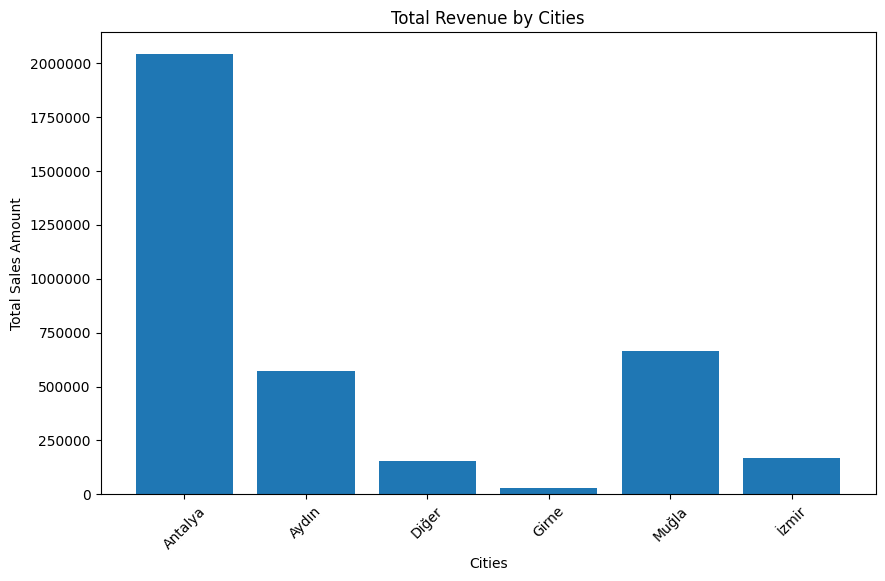

In [ ]:
# In this analysis, we are examining the total sales volume by city. 
# We aim to understand the total financial volume generated by each city. 

print(df.groupby("SaleCityName").agg({"Price": "sum"}))
sales_by_city = df.groupby("SaleCityName")["Price"].sum()

# Setting the x and y axes for the graph
x = sales_by_city.index
y = sales_by_city.values

# Setting the size of the graph
plt.figure(figsize=(10, 6))

# Plotting the bar chart
plt.bar(x, y)

# Adding axis labels and a title to the graph
plt.xlabel("Cities")
plt.ylabel("Total Sales Amount")
plt.title("Total Revenue by Cities")

# Rotating the axis labels
plt.xticks(rotation=45)

plt.ticklabel_format(style='plain', axis='y')

# Displaying the graph
plt.show()

              Price
SaleCityName       
Antalya       64.52
Aydın         53.86
Diğer         47.73
Girne         59.48
Muğla         62.46
İzmir         66.26


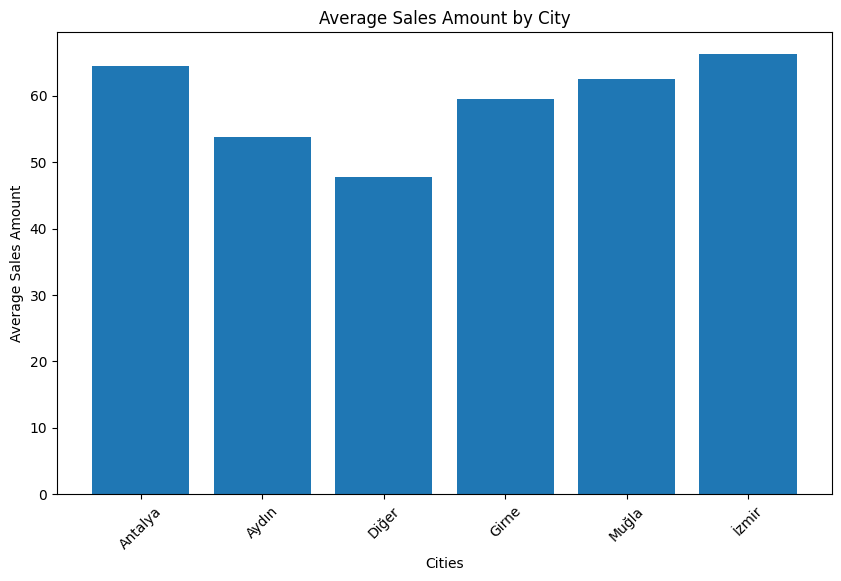

In [33]:
# Average Price Analysis by City
# In this analysis, we are calculating the average price for each city in our dataset. 
# We aim to understand the typical pricing levels across different cities to identify 
# which destinations tend to have higher or lower average prices. 

print(df.groupby(by=["SaleCityName"]).agg({"Price": "mean"}))
mean_sales_by_city = df.groupby("SaleCityName")["Price"].mean()

# Setting up the x and y axes for the plot
x = mean_sales_by_city.index
y = mean_sales_by_city.values

# Adjusting the size of the plot
plt.figure(figsize=(10, 6))

# Plotting the bar chart
plt.bar(x, y)

# Adding axis labels and a title to the plot
plt.xlabel("Cities")
plt.ylabel("Average Sales Amount")
plt.title("Average Sales Amount by City")

# Rotating the axis labels
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

In [34]:
# Revenue Analysis by Hotel Concept
print(df.groupby("ConceptName").agg({"Price": "sum"}))
# In this analysis, we are examining the total revenue generated by each accommodation concept type (like all-inclusive, half-board, etc.). 
# We aim to understand which concept types are bringing in the most revenue to help identify the most profitable accommodation formats. 

                    Price
ConceptName              
Herşey Dahil   3333278.84
Oda + Kahvaltı  121615.08
Yarım Pansiyon  174525.04


In [35]:
# Advanced Price Analysis
# In this visualization, we are creating an advanced bar chart that shows the average price breakdown by both city and concept type simultaneously. 
# We aim to understand how prices vary across different cities for each accommodation concept, allowing us to identify specific city-concept 
# combinations that command higher or lower prices.

mean_price_by_city_concept = df.groupby(["SaleCityName", "ConceptName"]).agg({"Price": "mean"}).reset_index()

# Creating the plot
fig = px.bar(mean_price_by_city_concept, x="SaleCityName", y="Price", color="ConceptName",
             title="Average PRICE by City-Concept")

# Setting the axis labels
fig.update_layout(xaxis_title="City", yaxis_title="Average PRICE")

# Displaying the plot
fig.show(block=True)

In [36]:
# Early Booking (EB) Score Classification System
bins = [-1, 7, 30, 90, df["SaleCheckInDayDiff"].max()]  
labels = ["Last Minutes", "Potential Planners", "Planners", "Early Bookers"]  
df["EB_Score"] = pd.cut(df["SaleCheckInDayDiff"], bins, labels=labels) 
# <- Importante... podemos colocar uma classificação por faixa de dias para a reserva
# In this analysis, we are creating a new categorical variable called "EB_Score" that segments our customers based on how far in advance they book their accommodations. 
# By dividing the booking time differences into four meaningful categories (Last Minutes, Potential Planners, Planners, and Early Bookers), 
# we aim to understand the booking behavior patterns of our customers and identify different types of planners in our customer base. 
df.head()


,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons,SaleYear,SaleMonth,SaleDay,EB_Score
0,2022-12-03,79.30,Herşey Dahil,Antalya,Saturday,0,Low,2022,12,3,Last Minutes
1,2022-12-03,45.97,Yarım Pansiyon,Antalya,Saturday,0,Low,2022,12,3,Last Minutes
2,2022-09-13,77.84,Herşey Dahil,Antalya,Tuesday,1,High,2022,9,12,Last Minutes
3,2022-12-10,222.71,Yarım Pansiyon,İzmir,Saturday,7,Low,2022,12,3,Last Minutes
4,2022-12-03,140.48,Yarım Pansiyon,İzmir,Saturday,2,Low,2022,12,1,Last Minutes


In [37]:
# Average salaries by City-Concept-EB Score
print(df.groupby(["SaleCityName", "ConceptName", "EB_Score"]).agg({"Price": ["mean", "count"]}))


mean_count_price_by_city_concept_eb = df.groupby(["SaleCityName", "ConceptName", "EB_Score"]).agg({"Price": ["mean", "count"]}).reset_index()
mean_count_price_by_city_concept_eb.columns = ["SaleCityName", "ConceptName", "EB_Score", "Mean_Price", "Count"]

# Graph creation
fig = px.bar(mean_count_price_by_city_concept_eb, x="SaleCityName", y="Mean_Price", color="EB_Score",
             facet_col="ConceptName",
             title="Average Prices by City-Concept-EB Score",
             labels={"EB_Score": "EB Score", "Mean_Price": "Average Price"},
             hover_data=["Count"])

# Updating axis labels
fig.update_layout(xaxis_title="SaleCityName", yaxis_title="Average Price")

# Showing the graph
fig.show()
# In this multi-dimensional analysis, we are examining the average prices and number of bookings across three key factors: cities, accommodation concepts, 
# and booking behavior (EB_Score). We aim to understand how these factors interact and affect both pricing and booking volumes, which helps us identify 
# popular combinations and their associated pricing patterns.



                                                Price       
                                                 mean  count
SaleCityName ConceptName    EB_Score                        
Antalya      Herşey Dahil   Last Minutes        62.75  14148
                            Potential Planners  64.90   8876
                            Planners            67.88   4490
                            Early Bookers       66.49   3281
             Oda + Kahvaltı Last Minutes        65.35    503
                            Potential Planners  57.74     75
                            Planners            39.85     15
                            Early Bookers       35.00      5
             Yarım Pansiyon Last Minutes        70.43    204
                            Potential Planners  55.64     39
                            Planners            58.03      9
                            Early Bookers       35.03      4
Aydın        Herşey Dahil   Last Minutes        51.71   3966
                        

In [38]:
# Average Prices by City-Concept-Season
print(df.groupby(["SaleCityName", "ConceptName", "Seasons"]).agg({"Price": ["mean", "count"]}))
mean_count_price_by_city_concept_seasons = df.groupby(["SaleCityName", "ConceptName", "Seasons"]).agg({"Price": ["mean", "count"]}).reset_index()
mean_count_price_by_city_concept_seasons.columns = ["SaleCityName", "ConceptName", "Seasons", "Mean_Price", "Count"]

# Creating the plot
fig = px.bar(mean_count_price_by_city_concept_seasons, x="SaleCityName", y="Mean_Price", color="Seasons",
             facet_col="ConceptName",
             title="Average Prices by City-Concept-Season",
             labels={"Seasons": "Season", "Mean_Price": "Average Price"},
             hover_data=["Count"])

# Updating axis labels
fig.update_layout(xaxis_title="SaleCityName", yaxis_title="Average Price")

# Showing the plot
fig.show()

# In this multi-dimensional analysis, we are examining the average prices and number of bookings based on a different combination of factors: cities, 
# accommodation concepts, and seasonality. We aim to understand how these three key variables interact to influence both pricing and booking volumes, 
# revealing patterns like which city-concept combinations are most popular in different seasons and their corresponding price points. 

                                     Price       
                                      mean  count
SaleCityName ConceptName    Seasons              
Antalya      Herşey Dahil   High     64.92  27126
                            Low      61.55   3669
             Oda + Kahvaltı High     66.27    303
                            Low      60.67    295
             Yarım Pansiyon High     73.26    118
                            Low      62.00    138
Aydın        Herşey Dahil   High     54.95  10104
                            Low      33.68    473
             Oda + Kahvaltı High     30.39     27
                            Low      44.45     11
             Yarım Pansiyon High     32.63     20
                            Low      25.27     11
Diğer        Herşey Dahil   High     83.73    365
                            Low      87.31    141
             Oda + Kahvaltı High     35.07    352
                            Low      40.01    409
             Yarım Pansiyon High     39.73    516


In [39]:
# Average Prices by City-Concept-CInDay
print(df.groupby(["SaleCityName", "ConceptName", "CInDay"]).agg({"Price": ["mean", "count"]}))

mean_count_price_by_city_concept_cinday = df.groupby(["SaleCityName", "ConceptName", "CInDay"]).agg({"Price": ["mean", "count"]}).reset_index()
mean_count_price_by_city_concept_cinday.columns = ["SaleCityName", "ConceptName", "CInDay", "Mean_Price", "Count"]

# Creating the plot
fig = px.bar(mean_count_price_by_city_concept_cinday, x="SaleCityName", y="Mean_Price", color="CInDay",
             facet_col="ConceptName",
             title="Average Prices by City-Concept-CInDay",
             labels={"CInDay": "CInDay", "Mean_Price": "Average Price"},
             hover_data=["Count"])

# Updating axis labels
fig.update_layout(xaxis_title="SaleCityName", yaxis_title="Average Price")

# Showing the plot
fig.show()

#  In this multi-dimensional analysis, we are examining the average prices and booking counts based on cities, accommodation concepts, 
# and length of stay (CInDay). We aim to understand how these factors come together to influence pricing and popularity, showing us 
# patterns such as which city-concept combinations are preferred for different durations of stay and their associated price levels. 

                                       Price      
                                        mean count
SaleCityName ConceptName    CInDay                
Antalya      Herşey Dahil   Friday     62.66  4138
                            Monday     63.26  6831
                            Saturday   64.42  4741
                            Sunday     65.85  3818
                            Thursday   62.89  3898
                            Tuesday    66.77  3760
                            Wednesday  67.17  3609
             Oda + Kahvaltı Friday     63.13   114
                            Monday     57.17    66
                            Saturday   58.01   117
                            Sunday     63.47    46
                            Thursday   64.65    93
                            Tuesday    65.84    73
                            Wednesday  72.81    89
             Yarım Pansiyon Friday     69.26    38
                            Monday     76.95    20
                            Sat

In [40]:
# Yearly Price Analysis
print(df.groupby(["SaleYear", "ConceptName", "SaleCityName"])["Price"].mean().reset_index().head())


mean_price_by_year_concept_city = df.groupby(["SaleYear", "ConceptName", "SaleCityName"])["Price"].mean().reset_index()

# Creating the chart
fig = px.bar(mean_price_by_year_concept_city, x="SaleYear", y="Price", color="ConceptName",
             facet_col="SaleCityName", title="Average Price by Year, Concept, and City",
             labels={"SaleYear": "Year", "Price": "Average Price"})

# Updating axis labels
fig.update_layout(xaxis_title="Year", yaxis_title="Average Price")

# Displaying the chart
fig.show()

# In this multi-dimensional analysis, we are examining the average prices across years, accommodation concepts, 
# and cities, with the data arranged in a clear tabular format (shown by .head()). We aim to identify how pricing 
# trends have evolved over time for different concept-city combinations, helping us understand temporal price patterns 
# in our hospitality business.



   SaleYear   ConceptName SaleCityName  Price
0      2016  Herşey Dahil      Antalya  71.34
1      2016  Herşey Dahil        Aydın  74.96
2      2016  Herşey Dahil        Diğer  82.65
3      2016  Herşey Dahil        Girne 121.64
4      2016  Herşey Dahil        Muğla  84.30


In [ ]:
# Top 20 Price Analysis by Location and Season
agg_df = df.groupby(["SaleCityName", "ConceptName", "Seasons"]).agg({"Price": "mean"}).sort_values("Price", ascending=False).head(20)
agg_df.reset_index(inplace=True)
print(agg_df)

mean_price_by_city_concept_seasons = df.groupby(["SaleCityName", "ConceptName", "Seasons"]).agg({"Price": "mean"}).sort_values("Price", ascending=False).reset_index()

# Creating the chart
fig = px.bar(mean_price_by_city_concept_seasons, x="SaleCityName", y="Price", color="ConceptName",
             facet_col="Seasons", title="Average Price by City, Concept, and Seasons",
             labels={"SaleCityName": "City", "Price": "Average Price", "ConceptName": "Concept", "Seasons": "Season"})

# Updating axis labels
fig.update_layout(xaxis_title="City", yaxis_title="Average Price")

# Displaying the chart
fig.show()

# In this focused analysis, we are looking at the top 20 highest-priced combinations of cities, accommodation concepts, and seasons. 
# By sorting these combinations in descending order of price, we aim to identify which specific combinations command premium pricing in our hospitality market.
# The reset_index() helps us manipulate this data more easily for further analysis or visualization.


   SaleCityName     ConceptName Seasons  Price
0         Girne    Herşey Dahil    High 103.94
1         Girne    Herşey Dahil     Low  90.94
2         Diğer    Herşey Dahil     Low  87.31
3         İzmir  Yarım Pansiyon    High  87.22
4         Diğer    Herşey Dahil    High  83.73
5         İzmir    Herşey Dahil    High  74.74
6         İzmir    Herşey Dahil     Low  74.31
7       Antalya  Yarım Pansiyon    High  73.26
8       Antalya  Oda + Kahvaltı    High  66.27
9       Antalya    Herşey Dahil    High  64.92
10        Muğla    Herşey Dahil    High  63.38
11      Antalya  Yarım Pansiyon     Low  62.00
12      Antalya    Herşey Dahil     Low  61.55
13        Muğla  Oda + Kahvaltı    High  61.26
14      Antalya  Oda + Kahvaltı     Low  60.67
15        Girne  Yarım Pansiyon    High  58.38
16        İzmir  Yarım Pansiyon     Low  55.35
17        Aydın    Herşey Dahil    High  54.95
18        İzmir  Oda + Kahvaltı    High  54.14
19        Girne  Yarım Pansiyon     Low  48.58


In [43]:
# Customer Segment Definition
agg_df["sales_level_based"] = agg_df[["SaleCityName", "ConceptName", "Seasons"]].agg(lambda x: '_'.join(x).upper(), axis=1)
agg_df["SEGMENT"] = pd.cut(agg_df["Price"], 4, labels=["D", "C", "B", "A"])
agg_df.head(30)

# In this analysis, we are performing two important transformations:
# First, we're creating a new feature called 'sales_level_based' that combines city, concept, and season information into a single identifier 
# (like 'ANTALYA_HERSEY_DAHIL_HIGH').
# Then, we're segmenting our prices into four categories (A, B, C, D), where A represents our highest price tier and D our lowest.
# We aim to create a standardized way to identify unique business combinations and their corresponding price segments, which helps us better 
# understand our pricing hierarchy across different service combinations.



,SaleCityName,ConceptName,Seasons,Price,sales_level_based,SEGMENT
0,Girne,Herşey Dahil,High,103.94,GIRNE_HERŞEY DAHIL_HIGH,A
1,Girne,Herşey Dahil,Low,90.94,GIRNE_HERŞEY DAHIL_LOW,A
2,Diğer,Herşey Dahil,Low,87.31,DIĞER_HERŞEY DAHIL_LOW,B
3,İzmir,Yarım Pansiyon,High,87.22,İZMIR_YARIM PANSIYON_HIGH,B
4,Diğer,Herşey Dahil,High,83.73,DIĞER_HERŞEY DAHIL_HIGH,B
5,İzmir,Herşey Dahil,High,74.74,İZMIR_HERŞEY DAHIL_HIGH,C
6,İzmir,Herşey Dahil,Low,74.31,İZMIR_HERŞEY DAHIL_LOW,C
7,Antalya,Yarım Pansiyon,High,73.26,ANTALYA_YARIM PANSIYON_HIGH,C
8,Antalya,Oda + Kahvaltı,High,66.27,ANTALYA_ODA + KAHVALTI_HIGH,C
9,Antalya,Herşey Dahil,High,64.92,ANTALYA_HERŞEY DAHIL_HIGH,C


In [44]:
# Segment Performance Metrics Analysis
print(agg_df.groupby("SEGMENT").agg({"Price": ["mean", "max", "min", "sum"]}))

# In this segment analysis, we are examining the statistical distribution of prices within each of our created segments (A, B, C, D). 
# We aim to understand the price characteristics of each segment by looking at their average prices, maximum and minimum values, 
# and total revenue contribution, which helps us validate our segmentation and understand the price ranges that define each segment level. 

        Price                    
         mean    max   min    sum
SEGMENT                          
D       57.43  62.00 48.58 516.89
C       69.48  74.74 63.38 416.88
B       86.09  87.31 83.73 258.26
A       97.44 103.94 90.94 194.87


In [45]:
# Price-Based Segment Ranking
print(agg_df.sort_values(by="Price"))
# In this data organization analysis, we are displaying our segmented data sorted by price in ascending order. 
# We aim to view our combination of cities, concepts, and seasons arranged from lowest to highest price points, 
# providing a clear sequential view of how our various service combinations are priced relative to each other.


   SaleCityName     ConceptName Seasons  Price            sales_level_based  \
19        Girne  Yarım Pansiyon     Low  48.58     GIRNE_YARIM PANSIYON_LOW   
18        İzmir  Oda + Kahvaltı    High  54.14    İZMIR_ODA + KAHVALTI_HIGH   
17        Aydın    Herşey Dahil    High  54.95      AYDIN_HERŞEY DAHIL_HIGH   
16        İzmir  Yarım Pansiyon     Low  55.35     İZMIR_YARIM PANSIYON_LOW   
15        Girne  Yarım Pansiyon    High  58.38    GIRNE_YARIM PANSIYON_HIGH   
14      Antalya  Oda + Kahvaltı     Low  60.67   ANTALYA_ODA + KAHVALTI_LOW   
13        Muğla  Oda + Kahvaltı    High  61.26    MUĞLA_ODA + KAHVALTI_HIGH   
12      Antalya    Herşey Dahil     Low  61.55     ANTALYA_HERŞEY DAHIL_LOW   
11      Antalya  Yarım Pansiyon     Low  62.00   ANTALYA_YARIM PANSIYON_LOW   
10        Muğla    Herşey Dahil    High  63.38      MUĞLA_HERŞEY DAHIL_HIGH   
9       Antalya    Herşey Dahil    High  64.92    ANTALYA_HERŞEY DAHIL_HIGH   
8       Antalya  Oda + Kahvaltı    High  66.27  ANTA